<a href="https://colab.research.google.com/github/MasoudAE21/HAZOP-Nodes-Prediction/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
# import torcheval
import pickle
directory = '/content/drive/MyDrive/emp/'
savepath = "/content/drive/MyDrive/paper/"
# model_savepath = "/content/drive/MyDrive/PID/Models"


In [ ]:
NPages = 10
df = pd.read_excel('/content/drive/MyDrive/Final Dataset2.xlsx')
df = df[df['Pages'] < 31]
df = df[df['Nodes'] < 26]
df

,Name,Pages,Nodes,Unit,class-5,class-3,class-6
0,112.1 (Fire Heater),2,1,Package,A,A,A
1,112.2 (Flare),1,1,Package,A,A,A
2,112.3 (Chemical Injection),2,1,Package,A,A,A
3,112.4 (Desalter),2,1,Package,A,A,A
4,160,1,1,Transmission Pipeline and Facilities,A,A,A
...,...,...,...,...,...,...,...
293,82,30,24,Production Unit,D,C,E
298,545,25,24,Utility and Off Site,D,C,E
299,547,24,24,Transmission Pipeline and Facilities,D,C,E
300,300,23,25,Storage Tank,E,C,E


In [ ]:
def gather_feature(dfr):
  x0 = np.zeros(7)
  x0[0] = dfr['Pages']
  unit = str(dfr['Unit'])
  match unit:                                      # 6 different classes for unit Type feature
     case 'Production Unit':
       x0[1] = 1
     case 'Package':
       x0[2] = 1
     case 'Petrochemical':
       x0[3] = 1
     case 'Storage Tank':
       x0[4] = 1
     case 'Transmission Pipeline and Facilities':
       x0[5] = 1
     case 'Utility and Off Site':
       x0[6] = 1
     case other:
       print("unit not available")
       print(dfr)

  return x0

In [ ]:
X = []
labels = []
nodes = []
for title, info in tqdm(df.iterrows()):
  row = gather_feature(info)
  X.append(row)
  labels.append(info['class-6'])
  nodes.append(info['Nodes'])

X = np.array(X)

nodes = np.array(nodes)

0it [00:00, ?it/s]

In [ ]:
print(X[50])

[3. 0. 0. 0. 0. 1. 0.]


Text(0.5, 1.0, 'Histogram of Nodes')

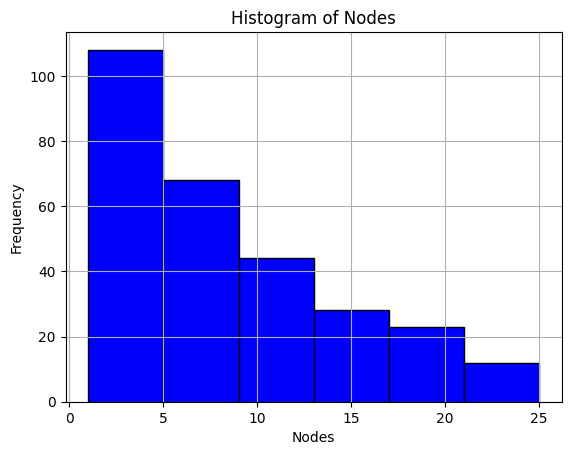

In [ ]:
# Histogram Nodes
plt.hist(df['Nodes'], bins=6, color='blue', edgecolor='black')
plt.grid(True)
plt.xlabel('Nodes')
plt.ylabel('Frequency')
plt.title('Histogram of Nodes')
# plt.show()

Text(0.5, 1.0, 'Histogram of Nodes')

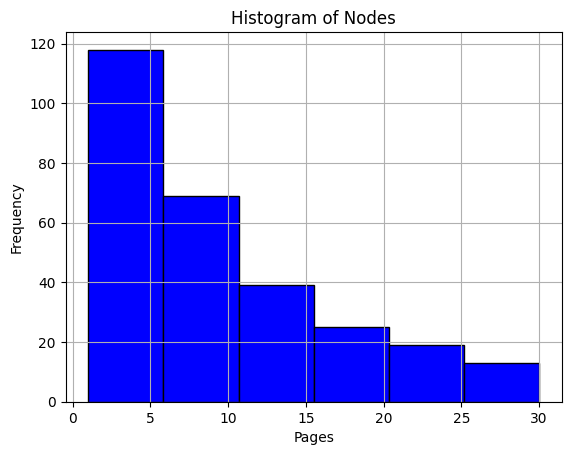

In [ ]:
# Histogram Pages
plt.hist(df['Pages'], bins=6, color='blue', edgecolor='black')
plt.grid(True)
plt.xlabel('Pages')
plt.ylabel('Frequency')
plt.title('Histogram of Nodes')

Text(0.5, 1.0, 'Histogram of Units')

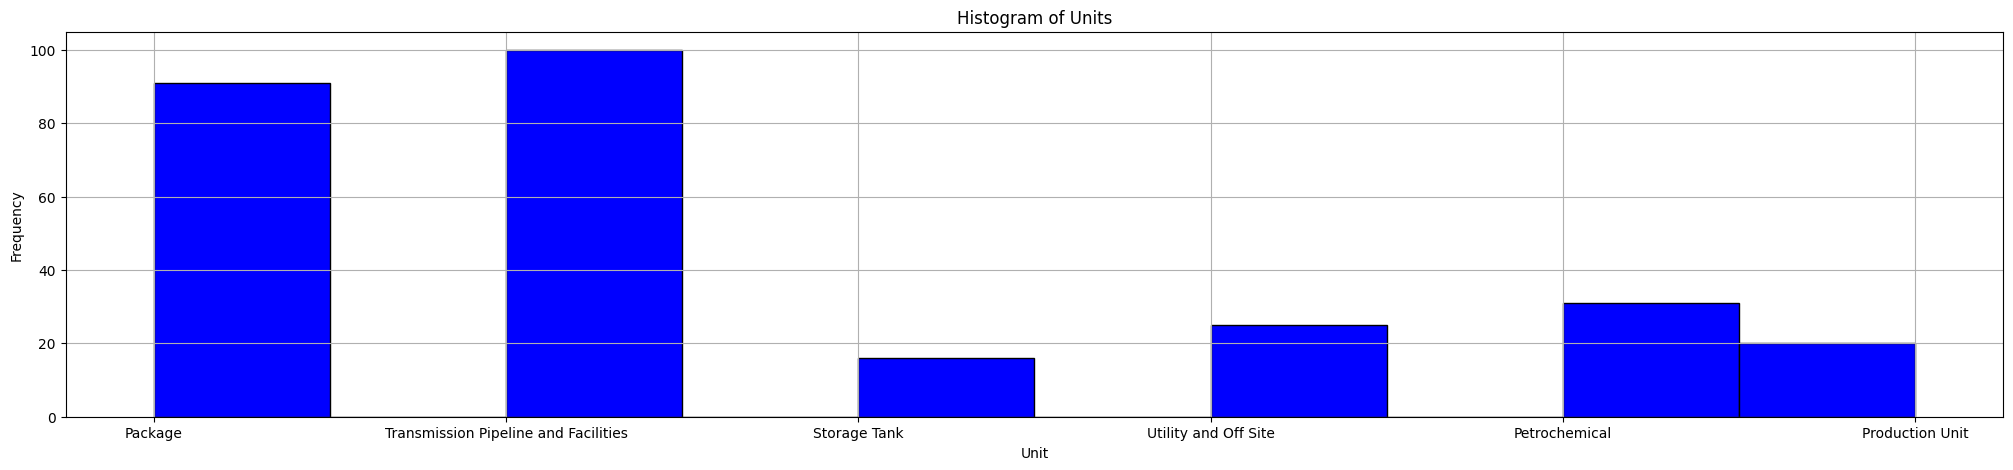

In [ ]:
plt.figure(figsize=(25,5))
plt.hist(df['Unit'], color='blue', edgecolor='black')
plt.grid(True)
plt.xlabel('Unit')
plt.ylabel('Frequency')
plt.title('Histogram of Units')
# plt.show()

<ipython-input-10-242615c322c8>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


Text(0.5, 1.0, 'Distribution')

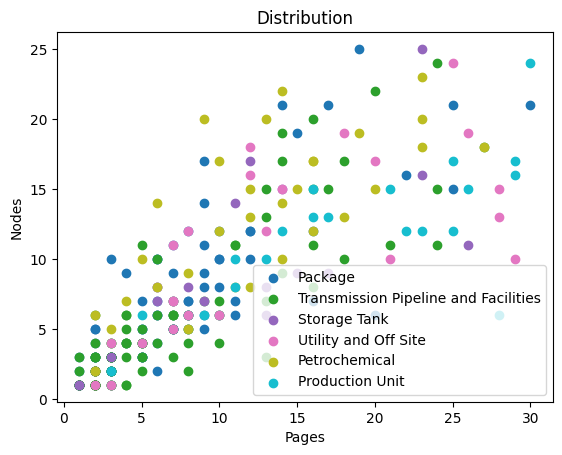

In [ ]:


# Get unique categories
categories = df['Unit'].unique()

# Create a color map (you can adjust it as needed)
colors = plt.cm.get_cmap('tab10', len(categories))

# Plot each category with a different color
for i, category in enumerate(categories):
    subset = df[df['Unit'] == category]
    plt.scatter(subset['Pages'], subset['Nodes'], label=category, color=colors(i))

# Add legend
plt.legend()
plt.xlabel('Pages')
plt.ylabel('Nodes')
plt.title('Distribution')

# Show the plot
# plt.show()


{-1: 24, 1: 259}


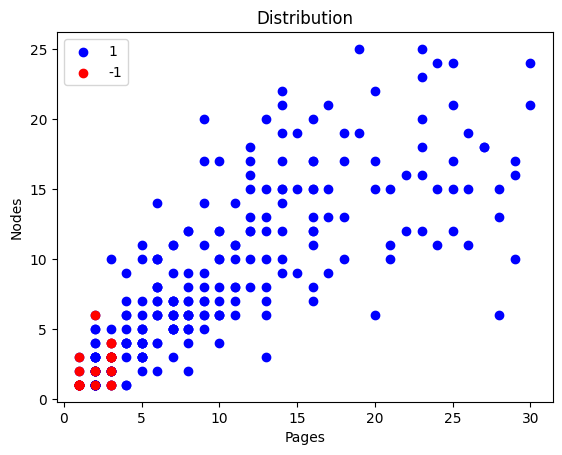

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

outlier_mdl = LocalOutlierFactor(n_neighbors=20, novelty=True)
outlier_mdl.fit(X)

pred = outlier_mdl.predict(X)
df['outlier'] = pred

unique, counts = np.unique(pred, return_counts=True)
print(dict(zip(unique, counts)))



outlier_categories = df['outlier'].unique()
# Create a color map (you can adjust it as needed)
colors = ['blue', 'red']

# Plot each category with a different color
for i, category in enumerate(outlier_categories):
    subset = df[df['outlier'] == category]
    plt.scatter(subset['Pages'], subset['Nodes'], label=category, color=colors[i])

# Add legend
plt.legend()
plt.xlabel('Pages')
plt.ylabel('Nodes')
plt.title('Distribution')

# Show the plot
plt.show()



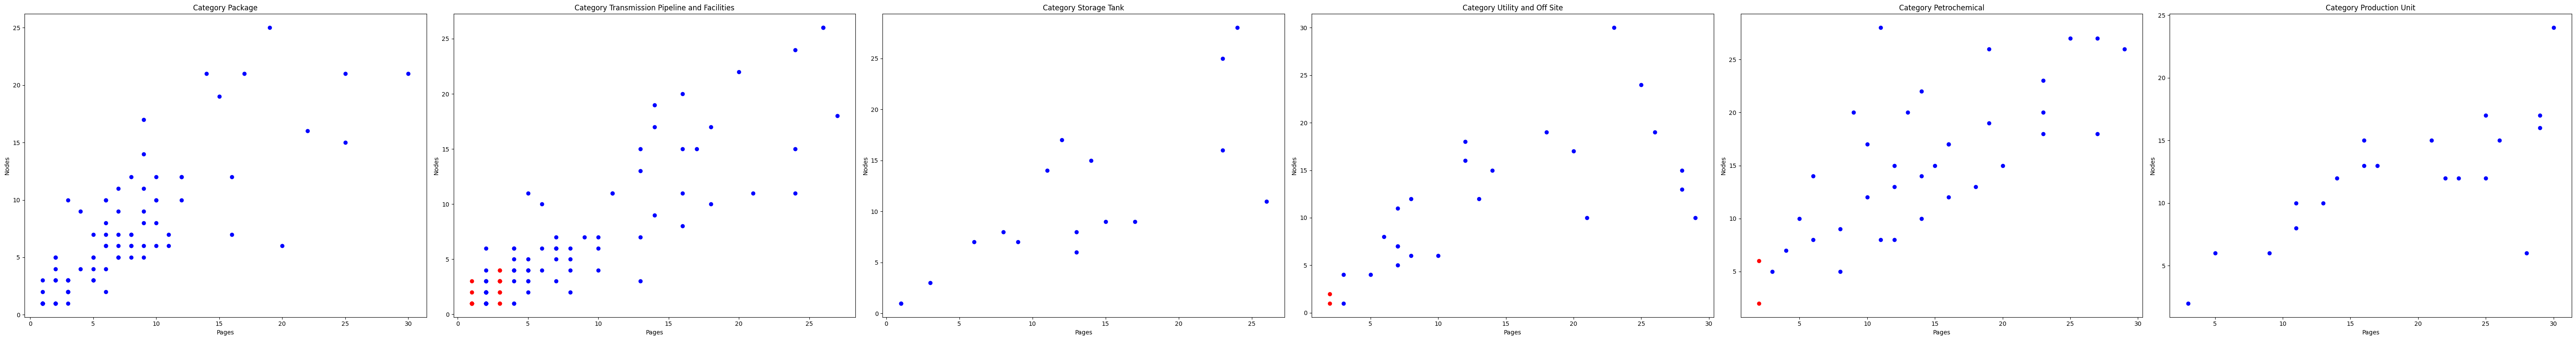

In [ ]:


# Create subplots with one row and columns equal to the number of categories
fig, axes = plt.subplots(1, len(categories), figsize=(10 * len(categories), 8))

# Create a color map (you can adjust it as needed)
colors = ['blue', 'red']

# Plot each category separately in its own subplot
for i, category in enumerate(categories):
    subset = df[df['Unit'] == category]
    for j, outlier_category in enumerate(outlier_categories):
        subset2 = subset[subset['outlier'] == outlier_category]
        axes[i].scatter(subset2['Pages'], subset2['Nodes'], color=colors[j], label=outlier_category)
    axes[i].set_title(f'Category {category}')
    axes[i].set_xlabel('Pages')
    axes[i].set_ylabel('Nodes')


# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
# plt.show()

In [ ]:
updated_df = df[df['outlier'] == 1]
updated_df.drop(columns=['outlier'], inplace=True)
# updated_df.to_excel(savepath + 'dataset_paper.xlsx')

<ipython-input-15-321b6f902cb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df.drop(columns=['outlier'], inplace=True)


In [ ]:
NPages = 10
updated_df = pd.read_excel("/content/drive/MyDrive/paper/dataset_paper.xlsx")
updated_df

,Unnamed: 0.1,Unnamed: 0,Name,Pages,Nodes,Unit,class-5,class-3,class-6
0,0,0,112.1 (Fire Heater),2,1,Package,A,A,A
1,1,1,112.2 (Flare),1,1,Package,A,A,A
2,2,2,112.3 (Chemical Injection),2,1,Package,A,A,A
3,3,3,112.4 (Desalter),2,1,Package,A,A,A
4,4,5,224.3.1,1,1,Package,A,A,A
...,...,...,...,...,...,...,...,...,...
254,254,293,82,30,24,Production Unit,D,C,E
255,255,298,545,25,24,Utility and Off Site,D,C,E
256,256,299,547,24,24,Transmission Pipeline and Facilities,D,C,E
257,257,300,300,23,25,Storage Tank,E,C,E


<ipython-input-14-fb1796f6f4c1>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(categories))


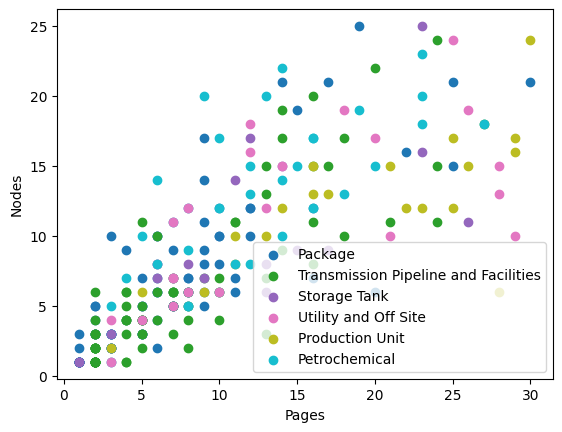

In [ ]:


# Get unique categories
categories = updated_df['Unit'].unique()

# Create a color map (you can adjust it as needed)
colors = plt.cm.get_cmap('tab10', len(categories))
# plt.figure(figsize=(6,4.5))
# Plot each category with a different color
for i, category in enumerate(categories):
    subset = updated_df[updated_df['Unit'] == category]
    plt.scatter(subset['Pages'], subset['Nodes'], label=category, color=colors(i))

# Add legend
plt.legend()
plt.xlabel('Pages')
plt.ylabel('Nodes')
# plt.title('Distribution')

# Show the plot
plt.show()

([<matplotlib.axis.XTick at 0x7fd58d250700>,
 [Text(0, 0, '1-5'),
  Text(1, 0, '6-10'),
  Text(2, 0, '11-15'),
  Text(3, 0, '16-20'),
  Text(4, 0, '21-25')])

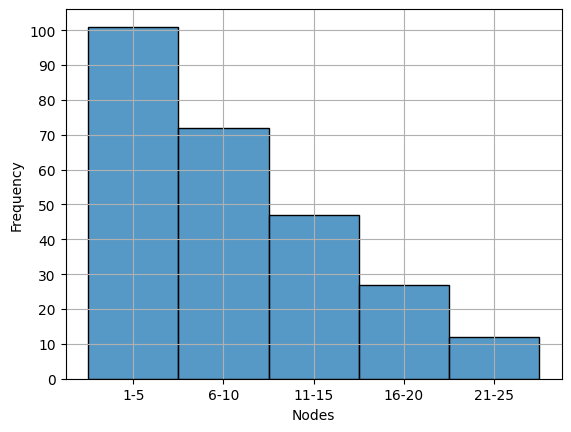

In [ ]:
sns.histplot(updated_df['class-6'])
plt.xlabel('Nodes')
plt.ylabel('Frequency')
# plt.title('Histogram of Nodes')
plt.grid(True)
plt.yticks(np.arange(0, 110, 10))
plt.xticks(plt.xticks()[0], ['1-5', '6-10', '11-15', '16-20', '21-25'])

Text(0.5, 23.52222222222222, 'Nodes')

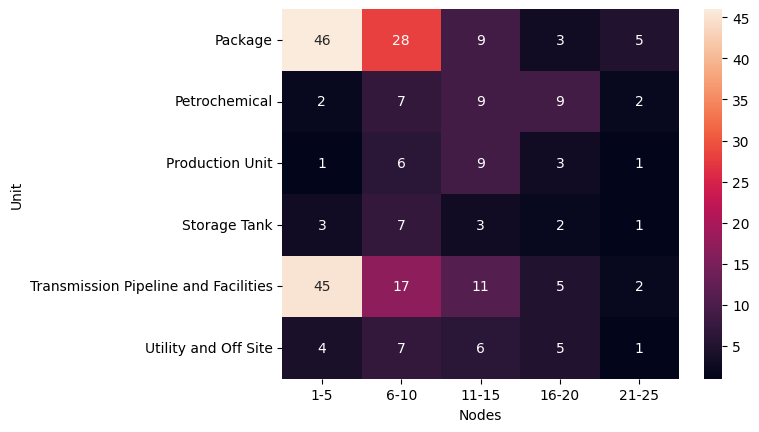

In [ ]:
ct = pd.crosstab(updated_df['Unit'], updated_df['class-6'])
sns.heatmap(ct, annot=True)
plt.xticks(plt.xticks()[0], ['1-5', '6-10', '11-15', '16-20', '21-25'])
plt.xlabel('Nodes')

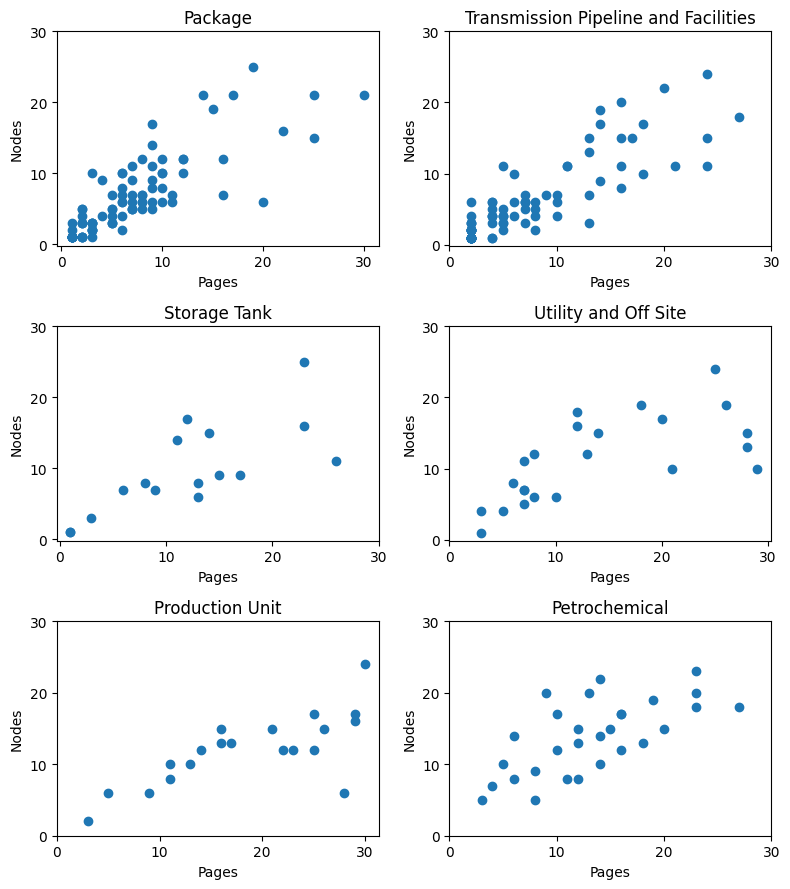

In [ ]:
# Create subplots with one row and columns equal to the number of categories
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(4*2, 3*3))  #
# Create a color map (you can adjust it as needed)
# colors = ['blue', 'red']

# Plot each category separately in its own subplot



for i, category in enumerate(categories):
    pos = axes[i // 2][i % 2]
    subset2 = updated_df[updated_df['Unit'] == category]
    pos.scatter(subset2['Pages'], subset2['Nodes'])
    pos.set_title(f'{category}')
    pos.set_xlabel('Pages')
    pos.set_ylabel('Nodes')

plt.setp(axes, xticks=np.arange(0,31,10), yticks=np.arange(0,31,10))

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
X = []
labels = []
nodes = []
for title, info in tqdm(updated_df.iterrows()):
  row = gather_feature(info)
  X.append(row)
  labels.append(info['class-6'])
  nodes.append(info['Nodes'])

unique, counts = np.unique(labels, return_counts=True)
wh = counts[0] / counts
print(wh)
print(dict(zip(unique, counts)))

X = np.array(X)
nodes = np.array(nodes)

#Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=21, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=21, stratify=y_train)

unique, counts = np.unique(y_train, return_counts=True)
wh = counts[0] / counts
print(wh)
print(dict(zip(unique, counts)))

0it [00:00, ?it/s]

[1.         1.40277778 2.14893617 3.74074074 8.41666667]
{'A': 101, 'B': 72, 'C': 47, 'D': 27, 'E': 12}
[1.         1.44444444 2.24137931 3.61111111 8.125     ]
{'A': 65, 'B': 45, 'C': 29, 'D': 18, 'E': 8}


In [ ]:
from sklearn.preprocessing import LabelEncoder
import torch

# Encode string labels to integers using LabelEncoder
label_encoder = LabelEncoder()
le = label_encoder.fit(y_test)
print(le.classes_)

labels_train = torch.tensor(le.transform(y_train))
labels_test = torch.tensor(le.transform(y_test))
labels_val = torch.tensor(le.transform(y_val))

['A' 'B' 'C' 'D' 'E']


In [ ]:
from sklearn.cluster import HDBSCAN, KMeans, Birch
from sklearn.metrics.cluster import contingency_matrix, silhouette_score, rand_score, adjusted_rand_score

# cluster_mdl = HDBSCAN(min_cluster_size=6, cluster_selection_epsilon=0.2)
cluster_mdl = KMeans(n_clusters=5, random_state=22, max_iter=2500)
# cluster_mdl = Birch(threshold=0.1, branching_factor=5, n_clusters=9)

cluster_mdl.fit(X)
cls_labels = cluster_mdl.labels_

# print(hdb.labels_) cluster_mdl.labels_

print(silhouette_score(X, labels))
print(silhouette_score(X, cls_labels))

print(contingency_matrix(labels, cls_labels))


print(adjusted_rand_score(labels, cls_labels))


0.1133151049788914
0.4916913250376102
[[62  1 13  0 25]
 [ 2 13 35  4 18]
 [ 0 21 11 13  2]
 [ 0 13  3 11  0]
 [ 0  4  0  8  0]]
0.28614202114745824


In [ ]:
print(labels)
print(cls_labels)

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',